In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [12]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [46]:
variable = "mean radius"
x = df[variable].values
y = data.target

In [47]:
# import optbinning
from optbinning import OptimalBinning
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp",max_n_prebins=2)
optb.fit(x, y)
binning_table = optb.binning_table
binning_table.build()


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 15.05)",397,0.697715,51,346,0.871537,-1.393464,1.015308,0.117549
1,"[15.05, inf)",172,0.302285,161,11,0.063953,3.204659,2.334984,0.208792
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,569,1.000000,212,357,0.627417,,3.350291,0.326342


## Note : 15.05 here is value for optimal binning in mean radius

In [48]:
print(optb.splits)

[15.04500008]


In [49]:
optb.status

'OPTIMAL'

In [18]:
binning_table = optb.binning_table

In [19]:
type(binning_table)

optbinning.binning.binning_statistics.BinningTable

In [20]:
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 15.05)",397,0.697715,51,346,0.871537,-1.393464,1.015308,0.117549
1,"[15.05, inf)",172,0.302285,161,11,0.063953,3.204659,2.334984,0.208792
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,569,1.000000,212,357,0.627417,,3.350291,0.326342


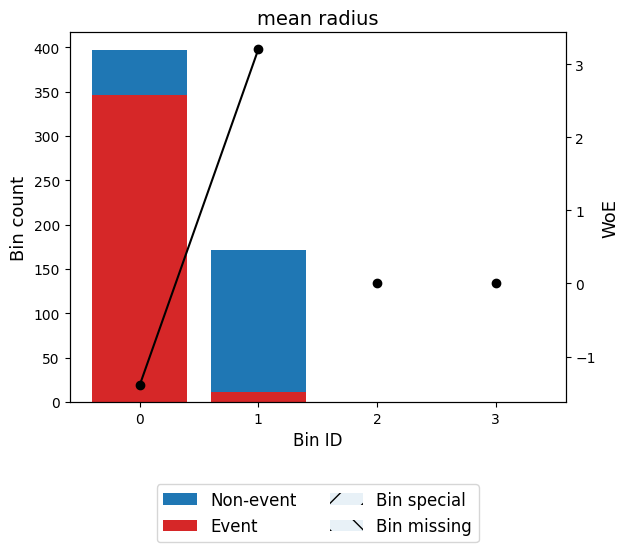

In [21]:
binning_table.plot(metric="woe")

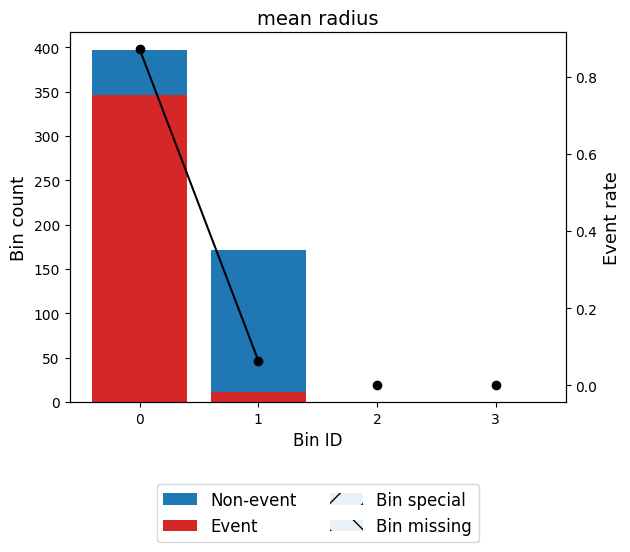

In [22]:
binning_table.plot(metric="event_rate")

In [23]:
x_transform_woe = optb.transform(x, metric="woe")

In [24]:
pd.Series(x_transform_woe).value_counts()

-1.393464    397
 3.204659    172
dtype: int64

In [25]:
x_transform_event_rate = optb.transform(x, metric="event_rate")

In [26]:
pd.Series(x_transform_event_rate).value_counts()

0.871537    397
0.063953    172
dtype: int64

In [27]:
x_transform_indices = optb.transform(x, metric="indices")

In [28]:
pd.Series(x_transform_indices).value_counts()

0    397
1    172
dtype: int64

In [29]:
x_transform_bins = optb.transform(x, metric="bins")

In [30]:
pd.Series(x_transform_bins).value_counts()

(-inf, 15.05)    397
[15.05, inf)     172
dtype: int64

### References

### http://gnpalencia.org/optbinning/binning_binary.html 

In [31]:
df_cat = pd.read_csv("/home/pradeep.k@zucisystems.com/Desktop/Tmp/application_train.csv",engine='c')
df_cat

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
variable_cat = "NAME_INCOME_TYPE"
x_cat = df_cat[variable_cat].values
y_cat = df_cat.TARGET.values

In [33]:
df_cat[variable_cat].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [34]:
optb = OptimalBinning(name=variable_cat, dtype="categorical", solver="mip",
                      cat_cutoff=0.1)

In [35]:
optb.fit(x_cat, y_cat)

OptimalBinning(cat_cutoff=0.1, dtype='categorical', name='NAME_INCOME_TYPE',
               solver='mip')

In [36]:
optb.status

'OPTIMAL'

### Advanced

In [27]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="mip")
optb.fit(x, y)

OptimalBinning(name='mean radius', solver='mip')

In [28]:
optb.information(print_level=0)

optbinning (Version 0.17.3)
Copyright (c) 2019-2022 Guillermo Navas-Palencia, Apache License 2.0

  Name    : mean radius                     
  Status  : OPTIMAL                         

  Time    : 0.0143  sec



In [29]:
optb.information(print_level=1)

optbinning (Version 0.17.3)
Copyright (c) 2019-2022 Guillermo Navas-Palencia, Apache License 2.0

  Name    : mean radius                     
  Status  : OPTIMAL                         

  Pre-binning statistics
    Number of pre-bins                     9
    Number of refinements                  1

  Solver statistics
    Type                                 mip
    Number of variables                   85
    Number of constraints                 45
    Objective value                   5.0439
    Best objective bound              5.0439

  Timing
    Total time                          0.01 sec
    Pre-processing                      0.00 sec   (  1.83%)
    Pre-binning                         0.00 sec   ( 32.65%)
    Solver                              0.01 sec   ( 62.84%)
    Post-processing                     0.00 sec   (  0.33%)



In [30]:
optb.information(print_level=2)

optbinning (Version 0.17.3)
Copyright (c) 2019-2022 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    name                         mean radius   * U
    dtype                          numerical   * d
    prebinning_method                   cart   * d
    solver                               mip   * U
    divergence                            iv   * d
    max_n_prebins                         20   * d
    min_prebin_size                     0.05   * d
    min_n_bins                            no   * d
    max_n_bins                            no   * d
    min_bin_size                          no   * d
    max_bin_size                          no   * d
    min_bin_n_nonevent                    no   * d
    max_bin_n_nonevent                    no   * d
    min_bin_n_event                       no   * d
    max_bin_n_event                       no   * d
    monotonic_trend                     auto   * d
    min_event_rate_diff                    0   * d
    max_pvalue     

In [31]:
binning_table.analysis(pvalue_test="chi2")

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.86104064
    IV (Jeffrey)             4.89095716
    JS (Jensen-Shannon)      0.38789207
    Hellinger                0.46195372
    Triangular               1.24822612
    KS                       0.72862164
    HHI                      0.29761151
    HHI (normalized)         0.18054676
    Cramer's V               0.79938464
    Quality score            0.00000000

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]     P[B > A]
        0      1    14.640450 1.300922e-04  0.999834 1.663823e-04
        1      2     2.669235 1.023052e-01  0.955269 4.473083e-02
        2      3    29.910964 4.523477e-08  1.000000 9.814594e-12
        3      4    19.324617 1.102754e-05  0.999999 1.216668e-06



In [32]:
binning_table.analysis(pvalue_test="fisher")

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.86104064
    IV (Jeffrey)             4.89095716
    JS (Jensen-Shannon)      0.38789207
    Hellinger                0.46195372
    Triangular               1.24822612
    KS                       0.72862164
    HHI                      0.29761151
    HHI (normalized)         0.18054676
    Cramer's V               0.79938464
    Quality score            0.00000000

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  odd ratio      p-value  P[A > B]     P[B > A]
        0      1   0.201190 8.287148e-04  0.999834 1.663823e-04
        1      2   0.503663 1.153088e-01  0.955269 4.473083e-02
        2      3   0.115702 3.464724e-08  1.000000 9.814594e-12
        3      4   0.037607 4.144258e-05  0.999999 1.216668e-06



In [33]:
variable = "mean texture"
x = df[variable].values
y = data.target

In [34]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")
optb.fit(x, y)

OptimalBinning(name='mean texture')

In [35]:
binning_table = optb.binning_table
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 15.05)",92,0.161687,4,88,0.956522,-2.569893,0.584986,0.057939
1,"[15.05, 16.39)",61,0.107206,8,53,0.868852,-1.369701,0.151658,0.017602
2,"[16.39, 17.03)",29,0.050967,6,23,0.793103,-0.822585,0.029715,0.003613
3,"[17.03, 18.46)",79,0.138840,17,62,0.784810,-0.772772,0.072239,0.008812
4,"[18.46, 19.47)",55,0.096661,20,35,0.636364,-0.038466,0.000142,0.000018
5,"[19.47, 20.20)",36,0.063269,18,18,0.500000,0.52115,0.017972,0.002221
6,"[20.20, 21.71)",72,0.126538,43,29,0.402778,0.915054,0.111268,0.013443
7,"[21.71, 22.74)",40,0.070299,27,13,0.325000,1.252037,0.113865,0.013371
8,"[22.74, 24.00)",29,0.050967,24,5,0.172414,2.089765,0.207309,0.022035
9,"[24.00, 26.98)",43,0.075571,30,13,0.302326,1.357398,0.142656,0.016578


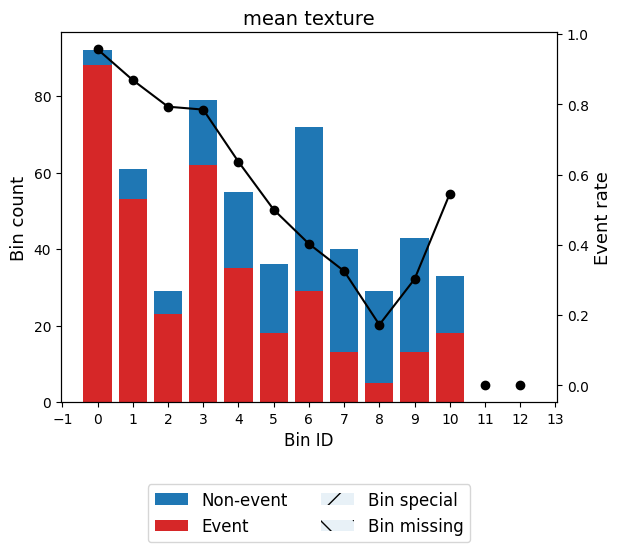

In [36]:
binning_table.plot(metric="event_rate")

In [37]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp",
                      monotonic_trend="descending")
optb.fit(x, y)

OptimalBinning(monotonic_trend='descending', name='mean texture')

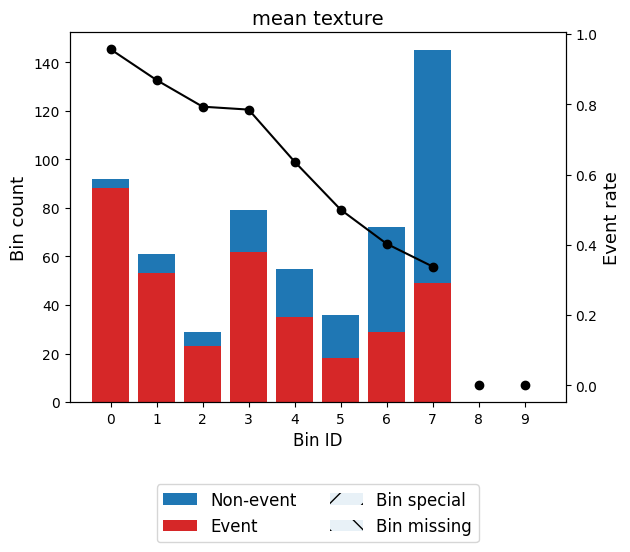

In [38]:
binning_table = optb.binning_table
binning_table.build()
binning_table.plot(metric="event_rate")